### 1) Import all the Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression

### 2) Load the Dataset

In [51]:
df = pd.read_csv('cars-used.csv')

In [52]:
df.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
5,A1,2016,13900,Automatic,32260,Petrol,30,58.9,1.4
6,A6,2016,13250,Automatic,76788,Diesel,30,61.4,2.0
7,A4,2016,11750,Manual,75185,Diesel,20,70.6,2.0
8,A3,2015,10200,Manual,46112,Petrol,20,60.1,1.4
9,A1,2016,12000,Manual,22451,Petrol,30,55.4,1.4


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [54]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [55]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

### 3) Plotting continuous numerical features

In [56]:
y = df['price']
df1 = df.drop('price', axis=1)
cols = [col for col in df1.columns if df1[col].dtype in ['int64','float64']]

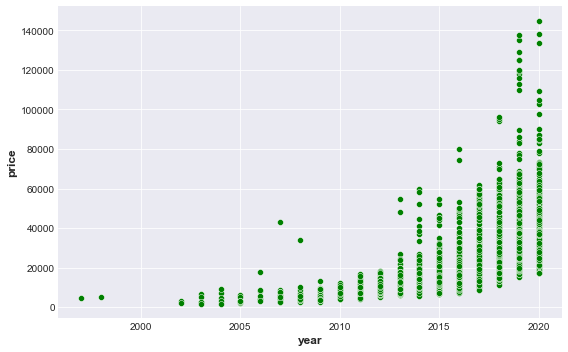

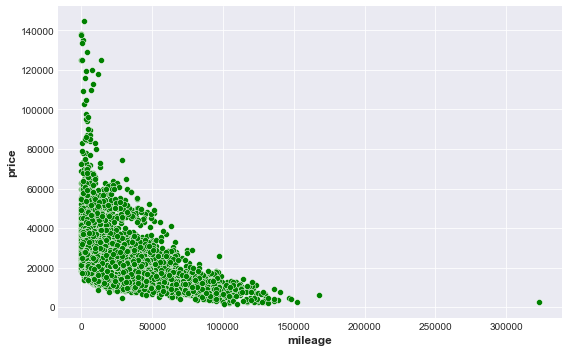

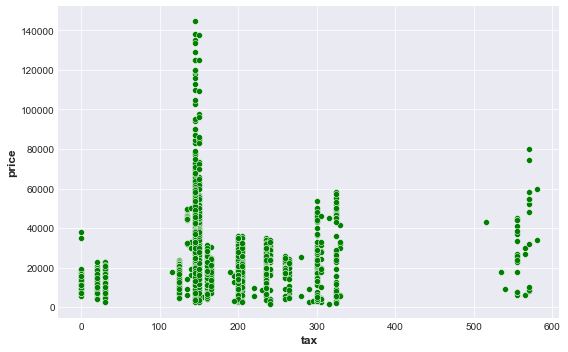

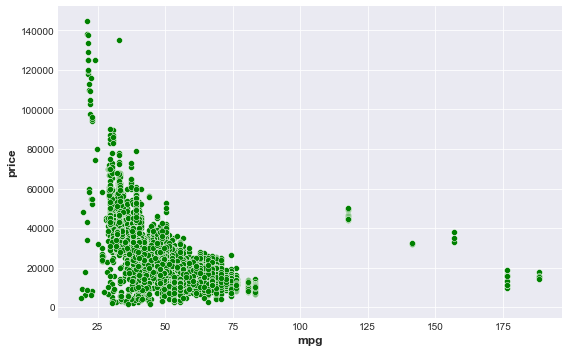

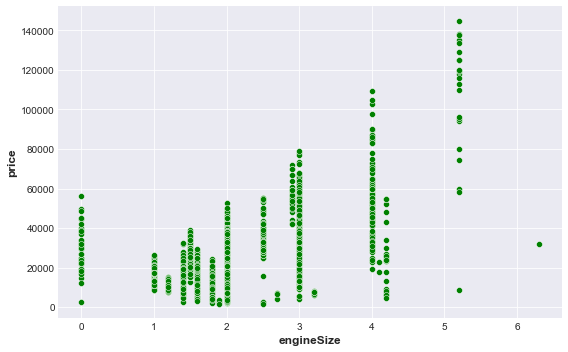

In [57]:
for idx, col in enumerate(cols):
    plt.figure(idx, figsize=(8,5))
    sns.scatterplot(x=col, y=y, data=df1, color= 'green')
    plt.show

### 4) Principal Component Analysis (PCA) object

In [58]:
features = ['mileage','year','mpg','tax','engineSize']
X = df1[features]
X_norm = (X - X.mean(axis=0))/X.std(axis=0)

In [59]:
pca = PCA()
X_pca = pca.fit_transform(X_norm)
names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pcadf = pd.DataFrame(X_pca, columns=names)

In [60]:
print(X_pcadf.head())
print("Shape of PCA dataframe:", X_pcadf.shape)

        PC1       PC2       PC3       PC4       PC5
0  0.090760 -0.570609  0.764235  0.477724 -0.189107
1  1.695531 -0.392693 -0.959671 -0.290391 -0.193339
2  1.372958 -0.846314  0.045635 -0.757974 -0.270327
3  0.594204 -0.060592 -0.251248  1.143175  0.014687
4 -0.671744 -1.585431  1.074037  0.237700  0.083554
Shape of PCA dataframe: (10668, 5)


In [61]:
pca.singular_values_

array([157.07494624, 128.5707558 ,  81.32535378,  58.01448569,
        46.39534781])

### 5) Principal Component Analysis (PCA) from scratch

In [62]:
cov_matrix = np.cov(X_norm.T)
print("Convariance matrix: ", cov_matrix)

Convariance matrix:  [[ 1.         -0.78966699  0.39510337 -0.16654715  0.07071017]
 [-0.78966699  1.         -0.35128087  0.09306616 -0.0315823 ]
 [ 0.39510337 -0.35128087  1.         -0.63590853 -0.36562073]
 [-0.16654715  0.09306616 -0.63590853  1.          0.39307544]
 [ 0.07071017 -0.0315823  -0.36562073  0.39307544  1.        ]]


In [63]:
#Calculating eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvectors:", eigenvectors)
print("Eigenvalues:", eigenvalues)

Eigenvectors: [[-0.48575669  0.46716498 -0.0732536  -0.7130325   0.17892982]
 [ 0.46373634 -0.48249022  0.26369364 -0.68624992 -0.10806712]
 [-0.5485194  -0.22908421  0.24802587  0.00616002 -0.76491314]
 [ 0.43356476  0.43702648 -0.49512711 -0.10954391 -0.60322362]
 [ 0.24522869  0.55271001  0.7864044   0.09277865 -0.08564328]]
Eigenvalues: [2.31297823 1.54968025 0.62002561 0.20179322 0.31552269]


In [64]:
# sorting in descending order
eig_pairs = [(eigenvalues[index],eigenvectors[:,index]) for index in range(len(eigenvalues))]

# sorting the pairs
eig_pairs.sort()

# reversing
eig_pairs.reverse()
print(eig_pairs)

# extracting the sorted eiganvalues and eiganvectors
eigenvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigenvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# printing the sorted eigan values
print("Sorted eigan values:", eigenvalues_sorted)

[(2.312978226060696, array([-0.48575669,  0.46373634, -0.5485194 ,  0.43356476,  0.24522869])), (1.54968025183722, array([ 0.46716498, -0.48249022, -0.22908421,  0.43702648,  0.55271001])), (0.6200256087189486, array([-0.0732536 ,  0.26369364,  0.24802587, -0.49512711,  0.7864044 ])), (0.315522691428291, array([ 0.17892982, -0.10806712, -0.76491314, -0.60322362, -0.08564328])), (0.2017932219548382, array([-0.7130325 , -0.68624992,  0.00616002, -0.10954391,  0.09277865]))]
Sorted eigan values: [2.312978226060696, 1.54968025183722, 0.6200256087189486, 0.315522691428291, 0.2017932219548382]


In [65]:
total = sum(eigenvalues_sorted)
var_exp= [(i/total) for i in eigenvalues_sorted]

# calculating cumulative variance
c_var_exp = np.cumsum(var_exp)

In [66]:
# transforming original dataframe into PCA
vect = np.array(eigenvectors_sorted)

# dot product to create principal components analysis
X_vect_pca = np.dot(X_norm,vect.T)

pd.DataFrame(X_vect_pca)

,0,1,2,3,4
0,-0.090760,-0.570609,-0.764235,-0.477724,0.189107
1,-1.695531,-0.392693,0.959671,0.290391,0.193339
2,-1.372958,-0.846314,-0.045635,0.757974,0.270327
3,-0.594204,-0.060592,0.251248,-1.143175,-0.014687
4,0.671744,-1.585431,-1.074037,-0.237700,-0.083554
...,...,...,...,...,...
10663,0.843949,-1.767887,-0.958674,-0.272181,-0.461441
10664,0.918381,-1.775900,-0.989172,-0.332613,-0.407711
10665,0.946673,-1.803109,-0.984906,-0.343034,-0.366183
10666,0.373421,-0.578826,-0.885789,-0.088680,0.400585


### 6) Plotting explained variance ratio

[0.46259565 0.30993605 0.12400512 0.06310454 0.04035864]


<function matplotlib.pyplot.show(close=None, block=None)>

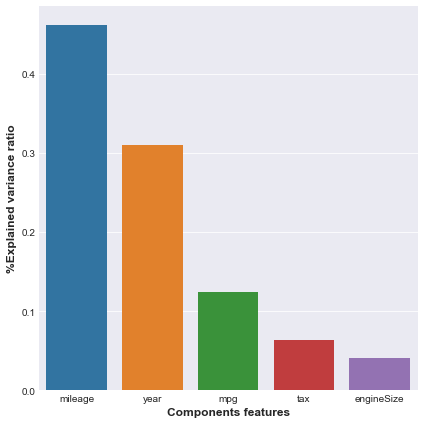

In [67]:
evr = pca.explained_variance_ratio_
print(evr)
features = ['mileage','year','mpg','tax','engineSize']

# plotting the EVR
plt.figure(figsize=(6,6))
sns.barplot(x=np.array(features), y=evr)
plt.xlabel("Components features")
plt.ylabel("%Explained variance ratio")
plt.show

### 7) Plotting explained variance

In [68]:
ev = pca.explained_variance_
print(ev)

[2.31297823 1.54968025 0.62002561 0.31552269 0.20179322]


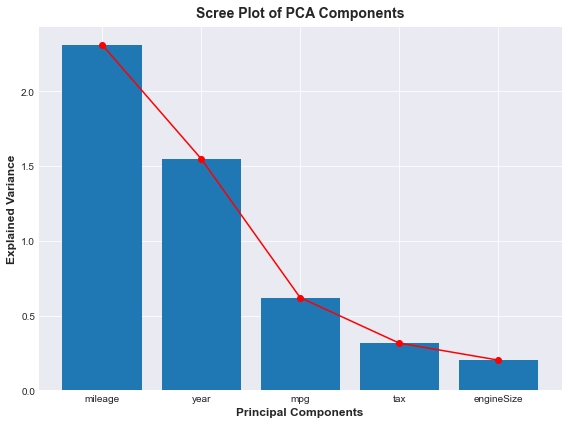

In [72]:
plt.figure(figsize=(8, 6))
plt.bar(features, ev)
plt.plot(features, ev, marker='o', color='red')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot of PCA Components')
plt.show()

### 8) Plotting Cumulative explained variance

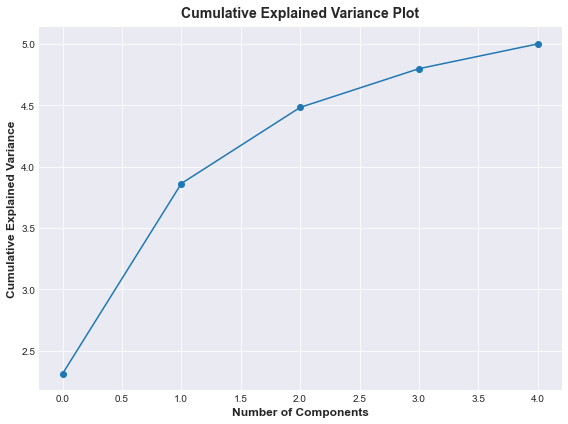

In [74]:
import numpy as np
import matplotlib.pyplot as plt
ev = [2.31297823, 1.54968025, 0.62002561, 0.31552269, 0.20179322]

cumulative_ev = np.cumsum(ev)

# Creating the plot
plt.figure(figsize=(8, 6))
plt.plot(cumulative_ev, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()


In [75]:
loadings = pd.DataFrame(pca.components_.T ,
                        index=np.array(features),
                        columns=names)

loadings

,PC1,PC2,PC3,PC4,PC5
mileage,0.485757,0.467165,0.073254,-0.178930,0.713033
year,-0.463736,-0.482490,-0.263694,0.108067,0.686250
mpg,0.548519,-0.229084,-0.248026,0.764913,-0.006160
tax,-0.433565,0.437026,0.495127,0.603224,0.109544
engineSize,-0.245229,0.552710,-0.786404,0.085643,-0.092779


In [76]:
pca.noise_variance_

0.0

### 9) Covariance matrix of Principal components

In [77]:
pca.get_covariance()

array([[ 1.        , -0.78966699,  0.39510337, -0.16654715,  0.07071017],
       [-0.78966699,  1.        , -0.35128087,  0.09306616, -0.0315823 ],
       [ 0.39510337, -0.35128087,  1.        , -0.63590853, -0.36562073],
       [-0.16654715,  0.09306616, -0.63590853,  1.        ,  0.39307544],
       [ 0.07071017, -0.0315823 , -0.36562073,  0.39307544,  1.        ]])

In [78]:
y = df['price']

mi_score = mutual_info_regression(X_pcadf,y, discrete_features=False)
mi_score = pd.Series(mi_score, index=X_pcadf.columns, name="MI_SCORE")

print(mi_score)

PC1    1.004871
PC2    0.315971
PC3    0.556826
PC4    0.311467
PC5    0.210122
Name: MI_SCORE, dtype: float64


### -----------------------------------------------------------------------------------------------------------------------------------------------------------